Canciones disponibles:
1. Virus - Pronta Entrega (192kHz)
2. Charli xcx - party 4 u (44kHz)



Visualizando: Charli xcx - party 4 u (44kHz)
Sample rate detectado: 44000 Hz
Forma del espectrograma: (25551, 1025)
Número de ventanas: 25551
Número de bins de frecuencia: 1025
Forma del espectrograma: (25551, 1025)
Número de ventanas: 25551
Número de bins de frecuencia: 1025


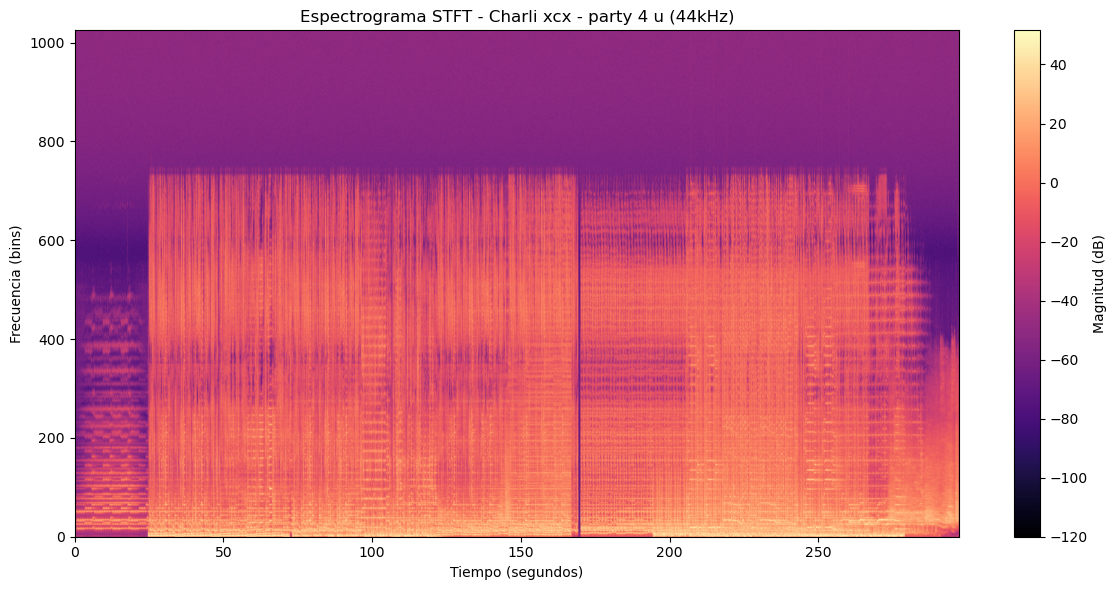


Duración del audio: 297.32 segundos


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Configuración del proyecto
RESULTS_DIR = "../results"
DEFAULT_HOP = 512  # Avance entre ventanas (debe coincidir con DEFAULT_HOP en common.h)

# Listar las carpetas (canciones) disponibles en results/
canciones = []
for item in os.listdir(RESULTS_DIR):
    path = os.path.join(RESULTS_DIR, item)
    if os.path.isdir(path):
        canciones.append(item)

# Verificar que haya canciones disponibles
if len(canciones) == 0:
    print("No se encontraron canciones en la carpeta results/")
    exit()

# Mostrar lista de canciones
print("Canciones disponibles:")
for i, cancion in enumerate(canciones):
    print(f"{i+1}. {cancion}")

# Pedir al usuario que elija
while True:
    try:
        opcion = int(input("\nIngrese el número de la canción a visualizar: "))
        if 1 <= opcion <= len(canciones):
            break
        else:
            print(f"Por favor, ingrese un número entre 1 y {len(canciones)}")
    except ValueError:
        print("Por favor, ingrese un número válido")

# Obtener la canción seleccionada
cancion_seleccionada = canciones[opcion - 1]
print(f"\nVisualizando: {cancion_seleccionada}")

# Extraer el sample rate del nombre de la carpeta
# Formato esperado: "nombre (XXkHz).wav" o similar
match = re.search(r'\((\d+)kHz\)', cancion_seleccionada)
if match:
    sample_rate = int(match.group(1)) * 1000  # Convertir kHz a Hz
    print(f"Sample rate detectado: {sample_rate} Hz")
else:
    # Valor por defecto si no se puede extraer
    sample_rate = 44100
    print(f"No se pudo detectar el sample rate, usando valor por defecto: {sample_rate} Hz")

# Cargar el espectrograma
spectrogram_path = os.path.join(RESULTS_DIR, cancion_seleccionada, "spectrogram.csv")
if not os.path.exists(spectrogram_path):
    print(f"Error: No se encontró el archivo {spectrogram_path}")
    exit()

mag = np.loadtxt(spectrogram_path, delimiter=",")

print(f"Forma del espectrograma: {mag.shape}")
print(f"Número de ventanas: {mag.shape[0]}")
print(f"Número de bins de frecuencia: {mag.shape[1]}")

# Calcular el tiempo en segundos para cada ventana
n_frames = mag.shape[0]
tiempo_total = (n_frames * DEFAULT_HOP) / sample_rate
tiempo_segundos = np.linspace(0, tiempo_total, n_frames)

# Convertir a decibelios para mejorar contraste visual
mag_db = 20 * np.log10(mag + 1e-6)

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.imshow(mag_db.T, origin="lower", aspect="auto", cmap="magma", 
           extent=[0, tiempo_total, 0, mag.shape[1]])
plt.colorbar(label="Magnitud (dB)")
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Frecuencia (bins)")
plt.title(f"Espectrograma STFT - {cancion_seleccionada}")
plt.tight_layout()
plt.show()

print(f"\nDuración del audio: {tiempo_total:.2f} segundos")